## 🟢 PowerCast – Advanced Track | Week 1: EDA Notebook

### 📦 Step 0: Imports & Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

%matplotlib inline

### 📥 Step 1: Load Data

In [4]:
df = pd.read_csv("Tetuan City power consumption.csv")
df['DateTime'] = pd.to_datetime(df['DateTime'], format='mixed')
df.set_index('DateTime', inplace=True)
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


### 🧭 Step 2: Time Consistency & Structure

Check for consistent 10-minute intervals

In [6]:
print("Time step frequency distribution:")
print(df.index.to_series().diff().value_counts().sort_index())

Time step frequency distribution:
DateTime
0 days 00:10:00    52415
Name: count, dtype: int64


Check for missing timestamps

In [7]:
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='10T')
missing = full_range.difference(df.index)
print(f"Missing timestamps: {len(missing)}")

Missing timestamps: 0


/var/folders/mc/b0sg9n8d77bdk0kglkp98k1w0000gn/T/ipykernel_99833/1757596539.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='10T')


Check for duplicates

In [8]:
duplicate_count = df.index.duplicated().sum()
print(f"Duplicate timestamps: {duplicate_count}")

Duplicate timestamps: 0


### 📊 Step 3: Temporal Trends & Seasonality

🔹 3.1 Daily Patterns in Power Consumption

/opt/homebrew/Caskroom/miniconda/base/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


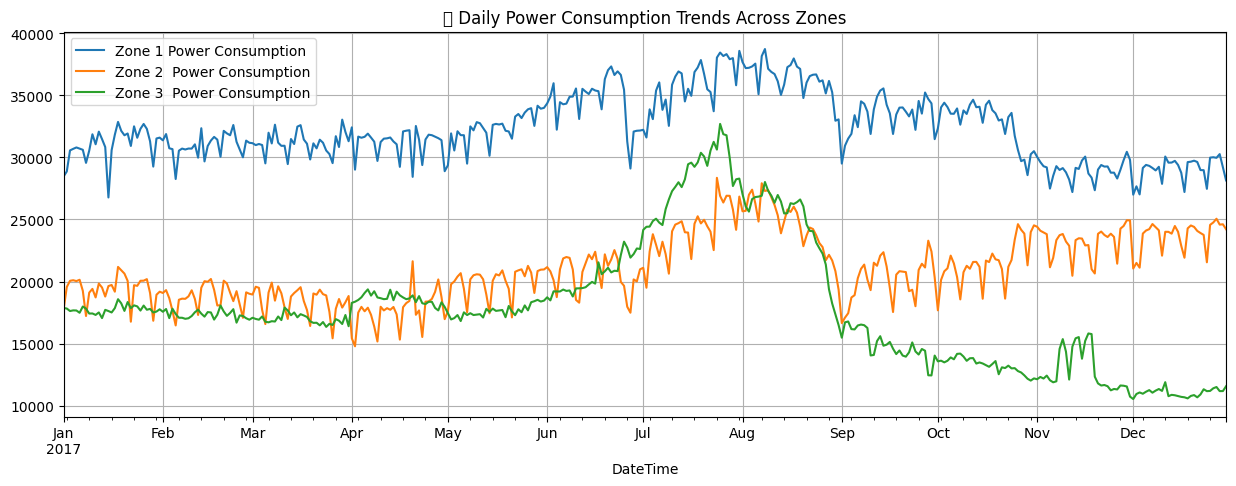

In [9]:
daily = df.resample('D').mean()
daily[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']].plot(
    figsize=(15, 5), title='📈 Daily Power Consumption Trends Across Zones'
)
plt.grid(True)
plt.show()

🔹 3.2 Hourly Power Usage

/opt/homebrew/Caskroom/miniconda/base/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128336 (\N{CLOCK FACE ONE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


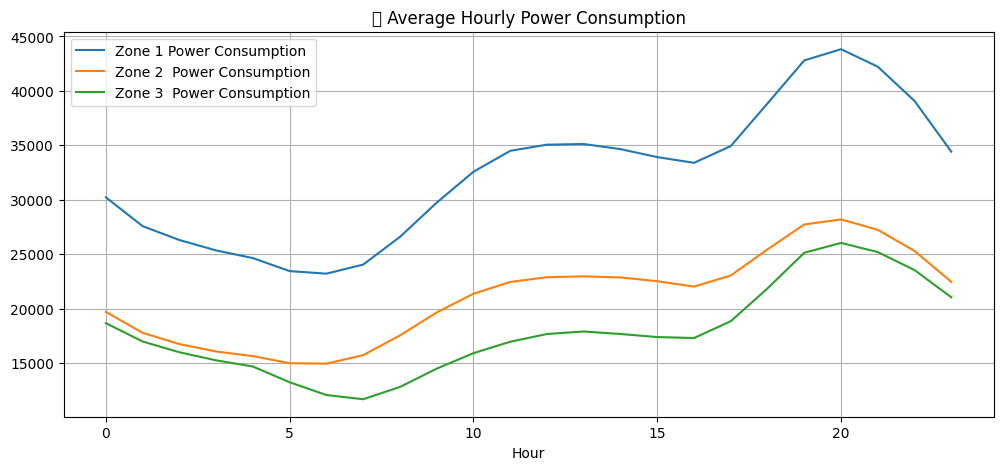

In [10]:
df['Hour'] = df.index.hour
hourly_avg = df.groupby('Hour')[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']].mean()
hourly_avg.plot(title='🕐 Average Hourly Power Consumption', figsize=(12, 5))
plt.grid(True)
plt.show()


🔹 3.3 Weekday Variability in Power Consumption

/opt/homebrew/Caskroom/miniconda/base/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


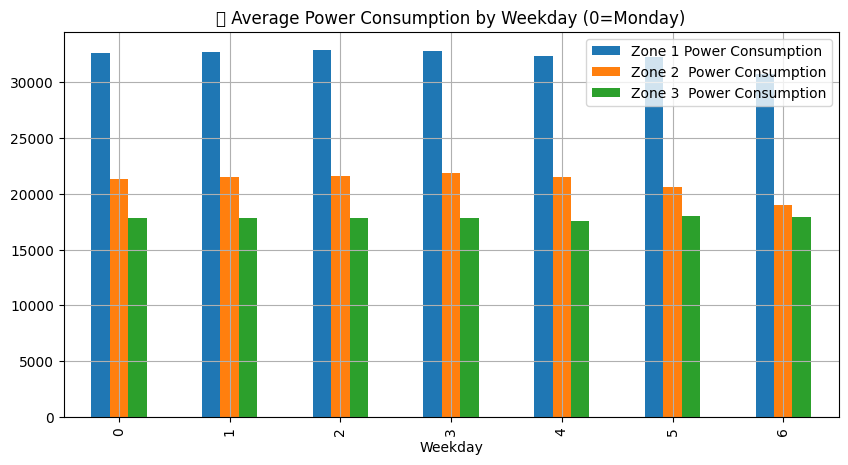

In [11]:
df['Weekday'] = df.index.weekday
weekday_avg = df.groupby('Weekday')[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']].mean()
weekday_avg.plot(kind='bar', title='📅 Average Power Consumption by Weekday (0=Monday)', figsize=(10, 5))
plt.grid(True)
plt.show()


## 🌦️ Step 4: Environmental Feature Relationships

🔹 4.1 Correlation Matrix – Environment vs Power Consumption

/opt/homebrew/Caskroom/miniconda/base/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


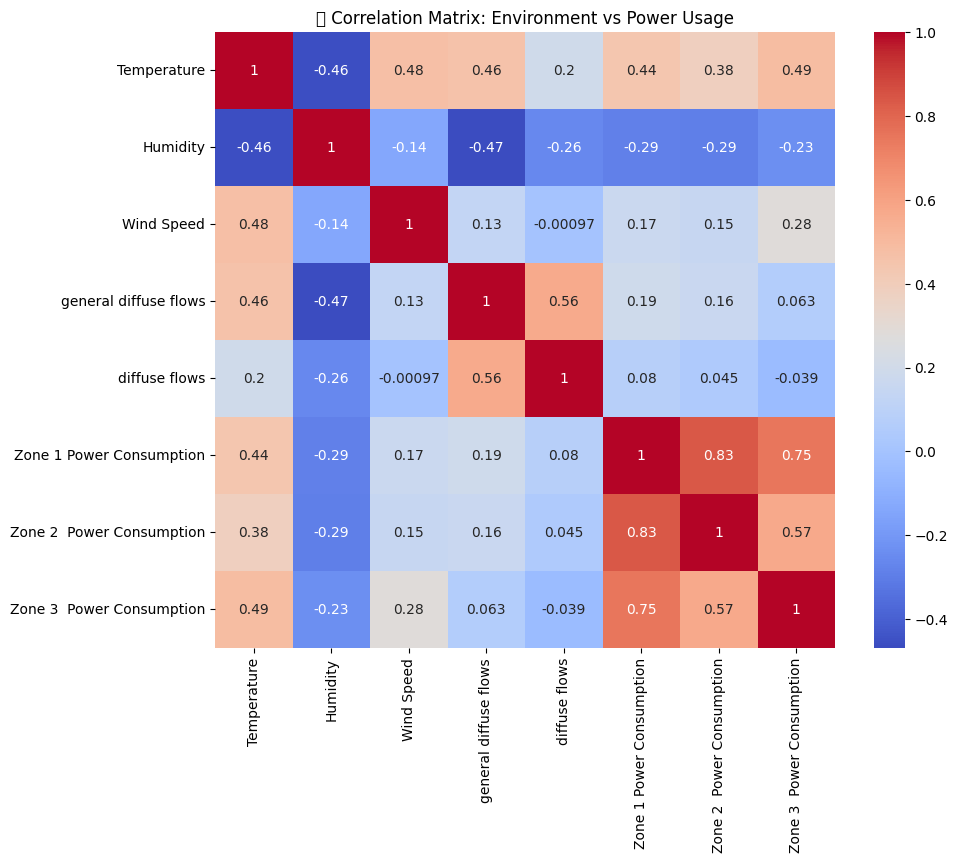

In [13]:
corr_df = df[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows',
              'Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title("📊 Correlation Matrix: Environment vs Power Usage")
plt.show()

🔹 4.2 Temperature vs Zone 1 Power Consumption

/opt/homebrew/Caskroom/miniconda/base/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


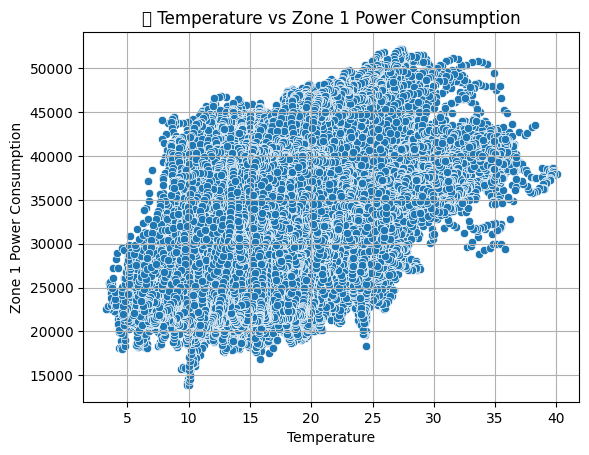

In [14]:
sns.scatterplot(x='Temperature', y='Zone 1 Power Consumption', data=df)
plt.title('🌡️ Temperature vs Zone 1 Power Consumption')
plt.grid(True)
plt.show()


🔹 4.3 Humidity vs Zone 1 Power Consumption


/opt/homebrew/Caskroom/miniconda/base/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


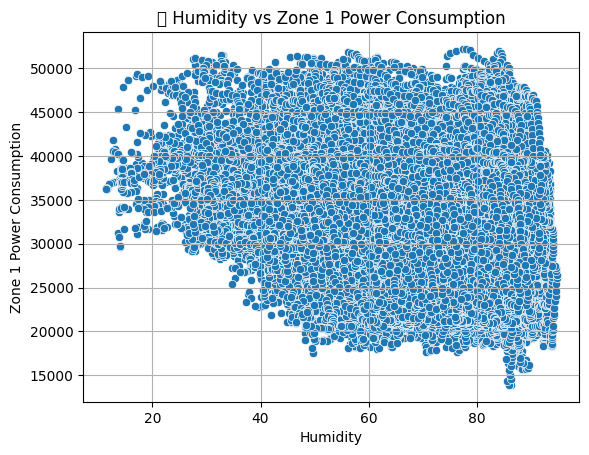

In [15]:
sns.scatterplot(x='Humidity', y='Zone 1 Power Consumption', data=df)
plt.title('💧 Humidity vs Zone 1 Power Consumption')
plt.grid(True)
plt.show()


### 🌀 Step 5: Lag Effects & Time Dependency

🔹 5.1 Lagged correlation of Temperature & Humidity with power usage


In [17]:
lags = range(1, 13)  # 10 to 120 minutes
lag_corrs = pd.DataFrame(index=lags)

for feature in ['Temperature', 'Humidity']:
    for zone in ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']:
        lag_corrs[f"{feature} → {zone}"] = [
            df[feature].shift(lag).corr(df[zone]) for lag in lags
        ]

🔹 5.2 Visualization of lag correlation

/opt/homebrew/Caskroom/miniconda/base/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


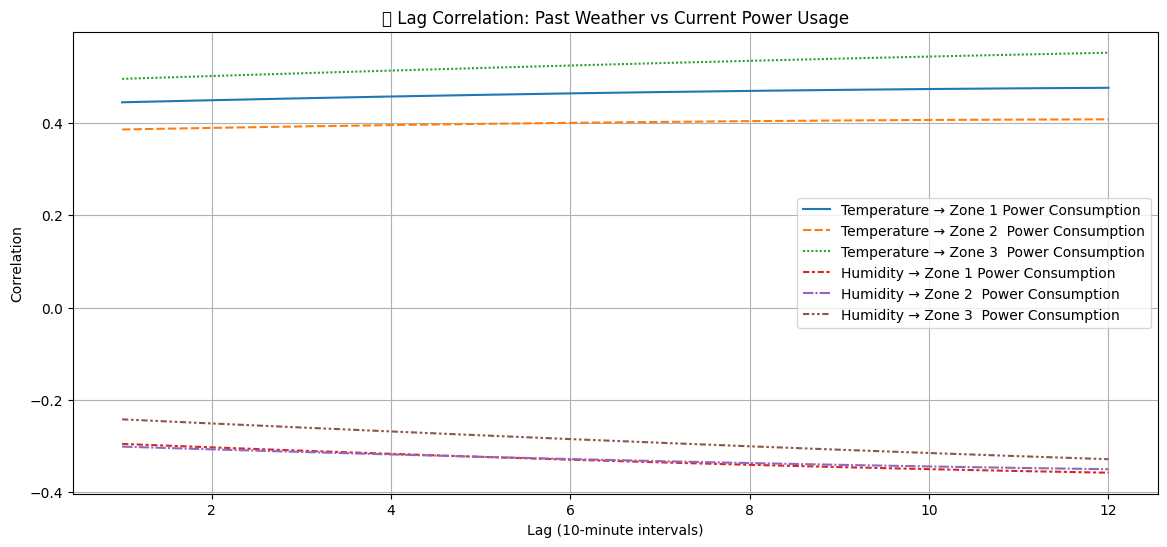

In [18]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=lag_corrs)
plt.title("⏳ Lag Correlation: Past Weather vs Current Power Usage")
plt.xlabel("Lag (10-minute intervals)")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()


🧠 5.3 Interpretation: Identify lag with maximum correlation for each feature → zone pair

In [ ]:
max_lag_corrs = lag_corrs.abs().idxmax()
max_lag_values = [
    lag_corrs.loc[lag, col] for col, lag in zip(max_lag_corrs.index, max_lag_corrs.values)
]

lag_insights = pd.DataFrame({
    "Feature → Zone": max_lag_corrs.index,
    "Most Relevant Lag (10-min intervals)": max_lag_corrs.values,
    "Max Correlation": max_lag_values
})
lag_insights.reset_index(drop=True, inplace=True)
lag_insights


,Feature → Zone,Most Relevant Lag (10-min intervals),Max Correlation
0,Temperature → Zone 1 Power Consumption,12,0.476484
1,Temperature → Zone 2 Power Consumption,12,0.408130
2,Temperature → Zone 3 Power Consumption,12,0.552462
3,Humidity → Zone 1 Power Consumption,12,-0.357614
4,Humidity → Zone 2 Power Consumption,12,-0.350013
5,Humidity → Zone 3 Power Consumption,12,-0.328341


### ⚠️ Step 6: Data Quality & Sensor Anomalies

🔹 6.1 Outlier Detection

In [21]:
# Calculate z-scores for each feature
z_scores = corr_df.apply(zscore)

# Count outliers per feature
outlier_counts = (z_scores.abs() > 3).sum()
print("📌 Outlier count per feature:")
print(outlier_counts)

# Show rows with any outlier
outliers = df[(z_scores.abs() > 3).any(axis=1)]
outliers.head()

📌 Outlier count per feature:
Temperature                    89
Humidity                      209
Wind Speed                      0
general diffuse flows          23
diffuse flows                1361
Zone 1 Power Consumption        0
Zone 2  Power Consumption       1
Zone 3  Power Consumption     656
dtype: int64


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Hour,Weekday
DateTime,,,,,,,,,,
2017-01-15 14:00:00,18.55,52.27,0.082,547.1,505.0,31819.74684,18375.68389,17534.45783,14,6
2017-01-15 14:10:00,18.97,51.50,0.084,530.7,514.3,31564.55696,18364.74164,17424.57831,14,6
2017-01-15 14:30:00,18.75,48.67,0.084,461.6,483.1,30671.39241,18145.89666,17713.73494,14,6
2017-01-15 14:40:00,18.85,48.90,0.081,455.9,489.3,30950.88608,18138.60182,17679.03614,14,6
2017-01-15 15:00:00,18.57,50.30,0.086,419.7,456.4,30549.87342,17883.28267,17141.20482,15,6


🔹 6.2 Outlier Treatment

In [22]:
df_clean = df[~(z_scores.abs() > 3).any(axis=1)]
print(f"Original shape: {df.shape}, After outlier removal: {df_clean.shape}")

Original shape: (52416, 10), After outlier removal: (50161, 10)
